## 1- Introduction

File can be found here: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Traffic_Crashes.csv")

In [3]:
df.shape

(887061, 48)

In [4]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [5]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [6]:
df.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

## 2- Data Cleaning

In [7]:
df.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 821444
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         688043
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27346
CRASH_TYPE                            0
INTERSECTION_RELATED_I           683481
NOT_RIGHT_OF_WAY_I               846589
HIT_AND_RUN_I                    608864
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [8]:
drop_list = ['CRASH_DATE_EST_I','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
             'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 
             'DOORING_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I','LATITUDE', 
             'LONGITUDE','CRASH_RECORD_ID','INJURIES_UNKNOWN','STREET_NO',
             'MOST_SEVERE_INJURY','SEC_CONTRIBUTORY_CAUSE','LOCATION','STREET_NAME']

df.drop(columns = drop_list, inplace = True)

In [9]:
df['INTERSECTION_RELATED_I'] = df['INTERSECTION_RELATED_I'].map(lambda x: 1 if x=='Y' else 0)
df['NOT_RIGHT_OF_WAY_I'] = df['NOT_RIGHT_OF_WAY_I'].map(lambda x:1 if x=='Y' else 0)
df['HIT_AND_RUN_I'] =df['HIT_AND_RUN_I'].map(lambda x:1 if x=='Y' else 0)

df['WORK_ZONE_I'].fillna(0, inplace=True)
df['WORK_ZONE_I'] =df['WORK_ZONE_I'].map(lambda x:1 if x=='Y' else 0)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_8428/780681168.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WORK_ZONE_I'].fillna(0, inplace=True)


In [10]:
df['INJURIES_TOTAL'].fillna(0, inplace=True)
df['INJURIES_FATAL'].fillna(0, inplace=True)
df['INJURIES_INCAPACITATING'].fillna(0, inplace=True)
df['INJURIES_NON_INCAPACITATING'].fillna(0, inplace=True)
df['INJURIES_REPORTED_NOT_EVIDENT'].fillna(0, inplace=True)
df['INJURIES_NO_INDICATION'].fillna(0, inplace=True)
df['LANE_CNT'].fillna(0, inplace=True)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_8428/68067356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INJURIES_TOTAL'].fillna(0, inplace=True)
/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_8428/68067356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [11]:
df.isna().sum()

CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                         0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
WORK_ZONE_I                      0
NUM_UNITS                        0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
CRASH_HOUR                       0
CRASH_DAY_OF_WEEK                0
CRASH_MONTH         

In [12]:
df['CRASH_DATE'] = pd.to_datetime(df.CRASH_DATE)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_8428/256589934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH_DATE'] = pd.to_datetime(df.CRASH_DATE)


In [13]:
df['CRASH_TYPE'].value_counts()

CRASH_TYPE
NO INJURY / DRIVE AWAY              648529
INJURY AND / OR TOW DUE TO CRASH    238532
Name: count, dtype: int64

In [14]:
df['CRASH_TYPE'] = df['CRASH_TYPE'].map(lambda x:1 if x == 'INJURY AND / OR TOW DUE TO CRASH' else 0)

In [15]:
df['CRASH_TYPE'].head()

0    1
1    0
2    0
3    0
4    1
Name: CRASH_TYPE, dtype: int64

In [16]:
df['INJURIES_NO_INDICATION'].values[df['INJURIES_NO_INDICATION'] > 7] =7
df['NUM_UNITS'].values[df['NUM_UNITS'] > 6] = 6
df['INJURIES_TOTAL'].values[df['INJURIES_TOTAL'] > 5] = 5

In [17]:
df['ROADWAY_SURFACE_COND'].value_counts()

ROADWAY_SURFACE_COND
DRY                657160
WET                115582
UNKNOWN             77971
SNOW OR SLUSH       28130
ICE                  5661
OTHER                2238
SAND, MUD, DIRT       319
Name: count, dtype: int64

In [18]:
df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR                       698615
RAIN                         76702
UNKNOWN                      50233
SNOW                         28400
CLOUDY/OVERCAST              25657
OTHER                         2742
FREEZING RAIN/DRIZZLE         1746
FOG/SMOKE/HAZE                1347
SLEET/HAIL                    1014
BLOWING SNOW                   444
SEVERE CROSS WIND GATE         154
BLOWING SAND, SOIL, DIRT         7
Name: count, dtype: int64

In [19]:
df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 502596
TRAFFIC SIGNAL              245895
STOP SIGN/FLASHER            87895
UNKNOWN                      37307
OTHER                         6010
YIELD                         1342
LANE USE MARKING              1226
OTHER REG. SIGN               1058
OTHER WARNING SIGN             709
PEDESTRIAN CROSSING SIGN       615
RAILROAD CROSSING GATE         575
FLASHING CONTROL SIGNAL        362
DELINEATORS                    351
SCHOOL ZONE                    345
POLICE/FLAGMAN                 305
OTHER RAILROAD CROSSING        191
RR CROSSING SIGN               189
NO PASSING                      56
BICYCLE CROSSING SIGN           34
Name: count, dtype: int64

In [20]:
df['ROAD_DEFECT'].value_counts()

ROAD_DEFECT
NO DEFECTS           707844
UNKNOWN              162207
RUT, HOLES             6321
OTHER                  4814
WORN SURFACE           3680
SHOULDER DEFECT        1540
DEBRIS ON ROADWAY       655
Name: count, dtype: int64

In [21]:
df['TRAFFICWAY_TYPE'].value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        382522
DIVIDED - W/MEDIAN (NOT RAISED)    140328
ONE-WAY                            112458
FOUR WAY                            60707
PARKING LOT                         60156
DIVIDED - W/MEDIAN BARRIER          50248
OTHER                               24015
ALLEY                               14597
T-INTERSECTION                      12058
UNKNOWN                             10411
CENTER TURN LANE                     6295
DRIVEWAY                             2857
RAMP                                 2780
UNKNOWN INTERSECTION TYPE            2707
FIVE POINT, OR MORE                  1346
Y-INTERSECTION                       1313
TRAFFIC ROUTE                        1112
NOT REPORTED                          667
ROUNDABOUT                            300
L-INTERSECTION                        184
Name: count, dtype: int64

## 3- Visualizations (Quick EDA)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'UNABLE TO DETERMINE'),
  Text(1, 0, 'FAILING TO YIELD RIGHT-OF-WAY'),
  Text(2, 0, 'FOLLOWING TOO CLOSELY'),
  Text(3, 0, 'NOT APPLICABLE'),
  Text(4, 0, 'IMPROPER OVERTAKING/PASSING'),
  Text(5, 0, 'FAILING TO REDUCE SPEED TO AVOID CRASH'),
  Text(6, 0, 'IMPROPER BACKING'),
  Text(7, 0, 'IMPROPER LANE USAGE'),
  Text(8, 0, 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'),
  Text(9, 0, 'IMPROPER TURNING/NO SIGNAL')])

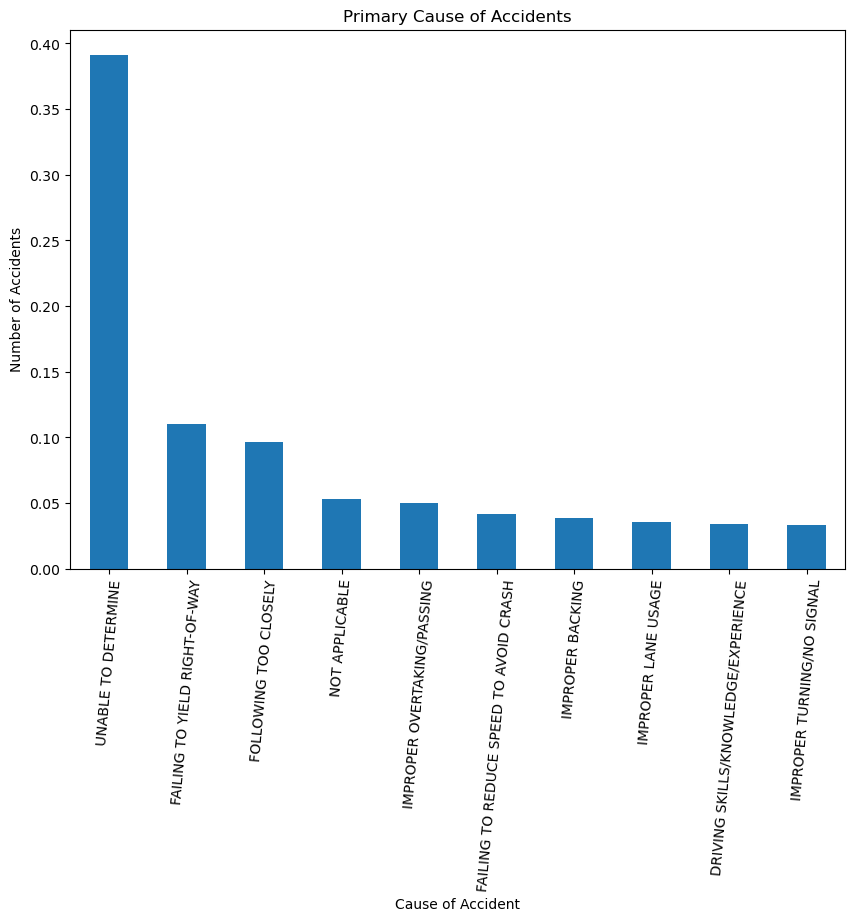

In [26]:
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,7))
plt.title('Primary Cause of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=85)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

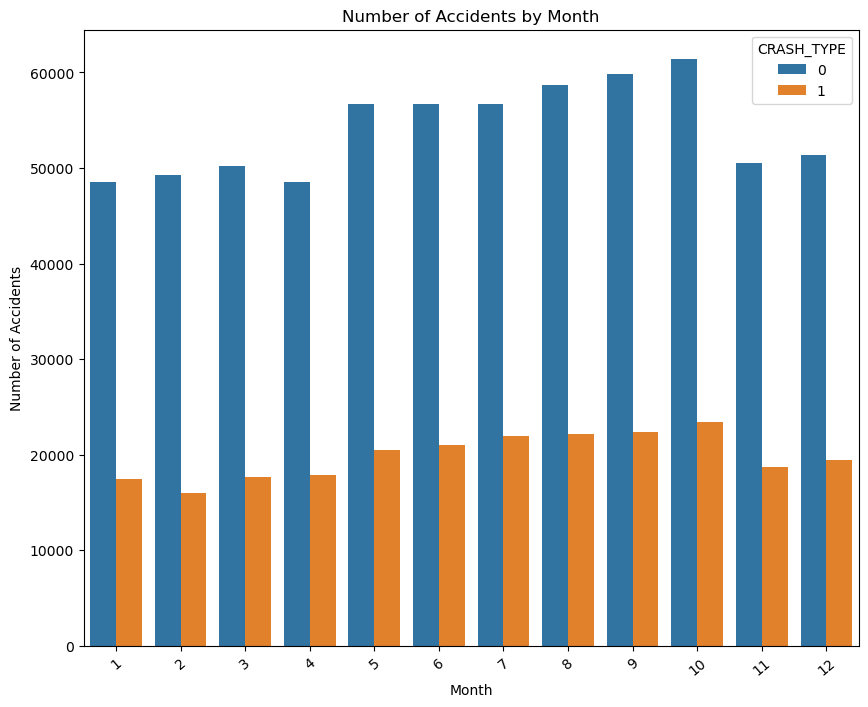

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(x="CRASH_MONTH", data=df, hue="CRASH_TYPE")
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)

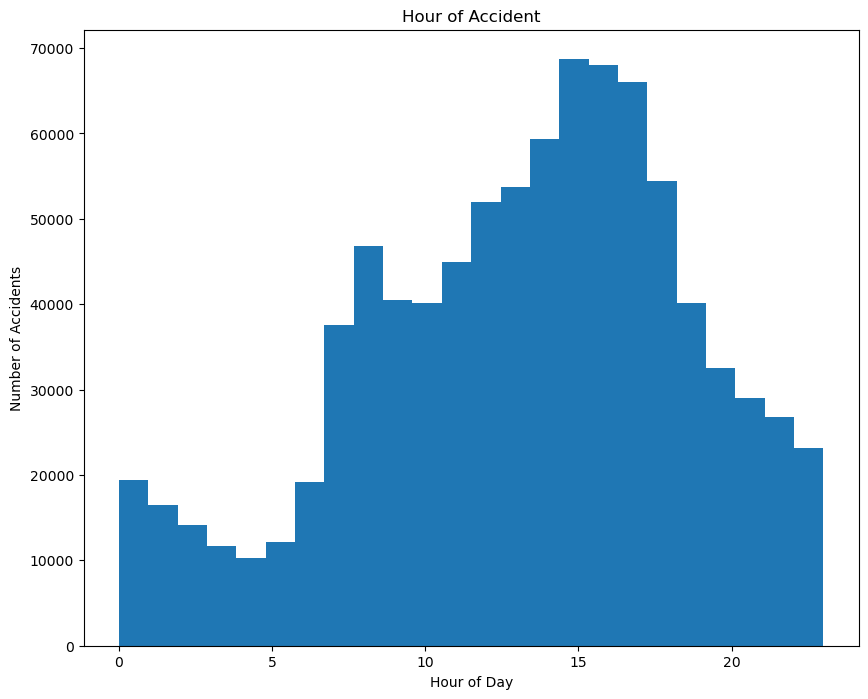

In [28]:
plt.figure(figsize=(10,8))
df['CRASH_HOUR'].plot(kind = 'hist', bins = 24)
plt.title('Hour of Accident')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'DRY'),
  Text(1, 0, 'SNOW OR SLUSH'),
  Text(2, 0, 'WET'),
  Text(3, 0, 'UNKNOWN'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'ICE'),
  Text(6, 0, 'SAND, MUD, DIRT')])

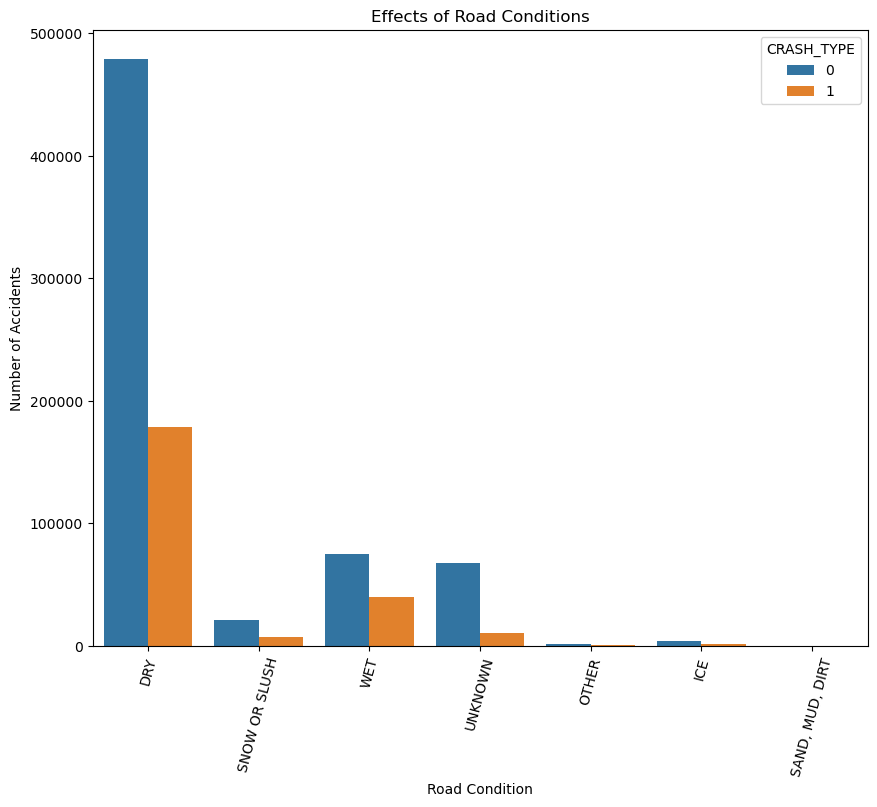

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x="ROADWAY_SURFACE_COND", data=df, hue="CRASH_TYPE")
plt.title('Effects of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)

In [32]:
dummies=['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION', 'WEATHER_CONDITION', 
         'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE', 
         'ROADWAY_SURFACE_COND', 'ALIGNMENT',
         'ROAD_DEFECT', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE']

df =  pd.get_dummies(df, columns = dummies, drop_first = True)

In [34]:
df.drop(columns=['CRASH_DATE'], axis = 1, inplace=True)

## 4- Model #1 (logistic regression)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [36]:
y = df['CRASH_TYPE']
X = df.drop(columns=['CRASH_TYPE'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
print(y_train.value_counts(), '--------------------------', y_test.value_counts())

CRASH_TYPE
0    486332
1    178963
Name: count, dtype: int64 -------------------------- CRASH_TYPE
0    162197
1     59569
Name: count, dtype: int64


In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e10)
logreg.fit(X_train, y_train)

/Users/tobiaspariente/anaconda3/envs/learn-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000000000.0)

In [44]:
logreg_results = logreg.predict(X_test)

In [78]:
print("f1 score Train:",metrics.f1_score(y_train, logreg.predict(X_train)))
print("f1 score  Test:",metrics.f1_score(y_test, logreg_results))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_results))

f1 score Train: 0.7562583116296159
f1 score  Test: 0.7568711596605872
Accuracy : 0.8875932288989296


In [47]:
print(classification_report(y_test, logreg_results))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93    162197
           1       0.90      0.65      0.76     59569

    accuracy                           0.89    221766
   macro avg       0.89      0.81      0.84    221766
weighted avg       0.89      0.89      0.88    221766



In [48]:
print(confusion_matrix(y_test,logreg_results))

[[158037   4160]
 [ 20768  38801]]


## 4- Model #2 (decision trees)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [50]:
dtree_default = DecisionTreeClassifier(class_weight='balanced')

In [51]:
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [52]:
dtree_results= dtree_default.predict(X_test)

In [53]:
print("f1 score Train:",metrics.f1_score(y_train, dtree_default.predict(X_train)))
print("f1 score Test :",metrics.f1_score(y_test, dtree_results))
print("Accuracy :",metrics.accuracy_score(y_test, dtree_results))

f1 score Train: 0.9939917073333407
f1 score Test : 0.6976193629560956
Accuracy : 0.8352768233182725


In [54]:
print(confusion_matrix(y_test, dtree_results))

[[143097  19100]
 [ 17430  42139]]


In [55]:
print(classification_report(y_test, dtree_results))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89    162197
           1       0.69      0.71      0.70     59569

    accuracy                           0.84    221766
   macro avg       0.79      0.79      0.79    221766
weighted avg       0.84      0.84      0.84    221766



## 5- Model #3 (pipeline using StandardScaler)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [72]:
logreg_pipeline = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

In [73]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [74]:
logreg_pipeline_results = logreg_pipeline.predict(X_test)

In [75]:
print("f1 score Train:",metrics.f1_score(y_train, logreg_pipeline.predict(X_train)))
print("f1 score Test: ",metrics.f1_score(y_test, logreg_pipeline_results))
print("Accuracy :",metrics.accuracy_score(y_test, logreg_pipeline_results))

f1 score Train: 0.7633105243898095
f1 score Test:  0.7635985903870611
Accuracy : 0.8901950704796948


In [76]:
print(confusion_matrix(y_test, logreg_pipeline_results))

[[158087   4110]
 [ 20241  39328]]


In [77]:
print(classification_report(y_test, logreg_pipeline_results))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93    162197
           1       0.91      0.66      0.76     59569

    accuracy                           0.89    221766
   macro avg       0.90      0.82      0.85    221766
weighted avg       0.89      0.89      0.88    221766



## 6- Final Decision of my Model

The best model is Model #3. 

Here's why:

* Has the highest F1 score on the test data (0.7636), indicating a better balance between precision and recall compared to the other models
* Has the highest accuracy (0.8902), indicating it correctly predicts more cases than the other models
* The precision (0.91) and recall (0.66) for class 1 (the minority class) in Model #3 are well-balanced compared to the other models, suggesting it performs well in predicting severe cases while keeping false positives in check

## 7- Recommendations

* Allocate more emergency resources during during the summer season
* Put more police and ambulances on standby during peak hours (morning and evening rush hours)